# Market Segmentation Analysis for a Fast Food Company

# Project Objective

* **Our aim is to figure out if there are different groups of customers who see our brand in different ways.**  
* **By identifying these groups and understanding their perspectives, we can tailor our messages to connect with them better, enhancing their relationship with the brand.**

# About the company

**We are working for a fast food company here that recently comducted a survey among its customers.**  
  
**The survey includes questions like**
* **1.  Age**
* **2.  Gender**
* **3. Visiting Frequency**
* **4. Rating on a scale of -5 to +5**
* **5. 11 Yes/No questions about how if they find our food tasty, cheap , healthy , etc**

# Sections

1. Libraries and Data Import 
2. Data Cleaning and preprocessing
3. A.Exploratory data analysis (EDA)  
   B.Principle Component Analysis (PCA)
4. Extracting the segments using K-Means
5. Analyzing the segments
6. Selecting the segments
7. Customizing the marketing mix

## Section 1: Libraries and Data Import

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Lets import the dataset

In [2]:
df = pd.read_excel('dataset .xls')

## Section 2: Data cleaning and preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female


* As discussed above, we have survey data of 1453 customers , about how they feel about the brand along with their respective gender,age , rating and frequency of visit.
* Like the first respondent is a 61 year old female who visits every three months for the convenience but does not find our products to be tasty.

### Lets see all the unique values in each column

In [58]:
values_list = []
for column in df.columns:
    unique_values = df[column].unique()
    values_list.append({'Column Name': column, 'Unique Values': unique_values})

values_table = pd.DataFrame(values_list)


In [59]:
pd.set_option('display.max_colwidth', None)
values_table

,Column Name,Unique Values
0,Like,"[-3, 2, 1, 4, 5, -5, -2, 3, 0, -4, -1]"
1,Age,"[61, 51, 62, 69, 49, 55, 56, 23, 58, 32, 53, 28, 65, 54, 67, 34, 31, 47, 37, 41, 36, 50, 39, 35, 20, 24, 44, 40, 48, 38, 57, 60, 66, 42, 26, 52, 29, 25, 22, 45, 18, 68, 43, 21, 27, 33, 63, 46, 59, 19, 64, 70, 30, 71]"
2,VisitFrequency,"[2, 4, 3, 1, 5, 0]"
3,Gender,"[Female, Male]"
4,yummy,"[False, True]"
5,convenient,"[True, False]"
6,spicy,"[False, True]"
7,fattening,"[True, False]"
8,greasy,"[False, True]"
9,fast,"[True, False]"


### Lets get dummy variables for the first eleven columns

The first 11 columns just has "Yes" and "No" values lets replace them with 1 and 0 respectively

In [60]:
df=pd.get_dummies(df,columns=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'],drop_first=True)

In [61]:
df.columns=['Like', 'Age', 'VisitFrequency', 'Gender','yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']

In [63]:
df.head(2)

,Like,Age,VisitFrequency,Gender,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-3,61,2,Female,False,True,False,True,False,True,True,False,True,False,False
1,2,51,2,Female,True,True,False,True,True,True,True,True,True,False,False


### Now, Lets remove the 'i love it' and 'i hate it' part from the "Like" Column

In [64]:
def slicer(x):
    if(len(x)>2):
        return x.split('!')[1]
    else:
        return x

In [65]:
df['Like']=df['Like'].apply(lambda x:str(x))     #Converting values to string so we can check their length
df['Like']=df['Like'].apply(lambda x:slicer(x))  #Slicing the values to return only the numeric rating part
df['Like']=df['Like'].apply(lambda x:int(x))     # Converting values into int type again

In [66]:
df['Like'].unique()

array([-3,  2,  1,  4,  5, -5, -2,  3,  0, -4, -1], dtype=int64)

In [67]:
df.head()

,Like,Age,VisitFrequency,Gender,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-3,61,2,Female,False,True,False,True,False,True,True,False,True,False,False
1,2,51,2,Female,True,True,False,True,True,True,True,True,True,False,False
2,1,62,2,Female,False,True,True,True,True,True,False,True,True,True,False
3,4,69,4,Female,True,True,False,True,True,True,True,True,False,False,True
4,2,49,3,Male,False,True,False,True,True,True,True,False,False,True,False


The data looks good now , lets move to EDA

## Section 3-A: Exploratory data analysis (EDA)

In [68]:
df.describe()

,Like,Age,VisitFrequency
count,1453.000000,1453.000000,1453.000000
mean,0.777013,44.604955,2.383345
std,3.116842,14.221178,1.292987
min,-5.000000,18.000000,0.000000
25%,-1.000000,33.000000,1.000000
50%,1.000000,45.000000,3.000000
75%,3.000000,57.000000,3.000000
max,5.000000,71.000000,5.000000


### Lets plot the mean of the 11 features , to get an idea of the general perception people have.

In [69]:
df_temp=pd.DataFrame(df.describe().loc['mean'].round(2)[2:13])
df_temp

,mean
VisitFrequency,2.38


In [82]:
plt.figure(figsize=(10,6))

ax=sns.barplot(x=df.columns[4:],y=df_temp['mean'])
ax.set_xlabel("Attributes")
ax.set_ylabel("Mean")
for i in ax.containers:
    ax.bar_label(i,)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


ValueError: Grouper and axis must be same length

<Figure size 1000x600 with 0 Axes>

* **The data indicates that about half of the respondents (55%) perceive our food as YUMMY**
* **91% believe it is CONVENIENT**
* **Only 9% think food is SPICY**
* **24 % find it disgusting**

### Gender distribution of the customers

In [83]:
gender_distribution = df.groupby('Gender')['Like'].count()
gender_distribution

Gender
Female    788
Male      665
Name: Like, dtype: int64

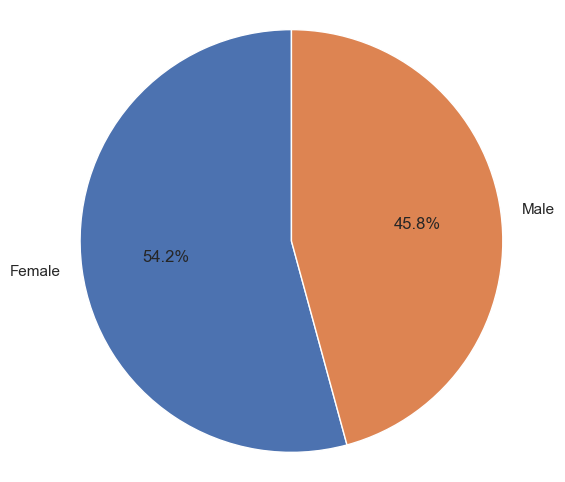

In [86]:
labels = gender_distribution.index
sizes = gender_distribution.values

plt.figure(figsize=(6, 6))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 

plt.show()


* **Around 54.2% of our customers are female**

### Age Distribution of customers

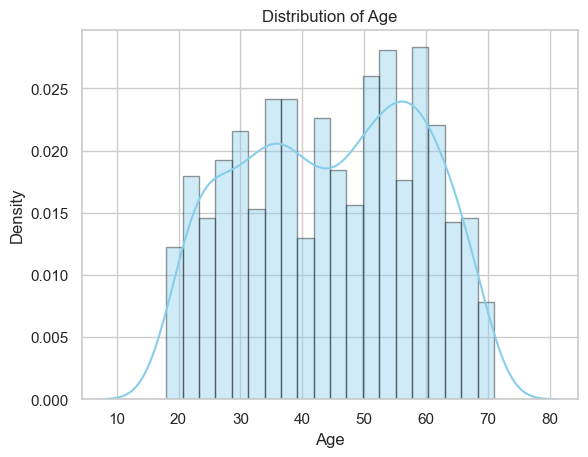

In [87]:
sns.distplot(df['Age'], bins=20, color='skyblue', hist_kws={"edgecolor": "black"})
plt.title("Distribution of Age")
plt.show()


* **The age distribution is alomost uniform but we have more people in the 50-60 age group**

### Distribution of ratings 

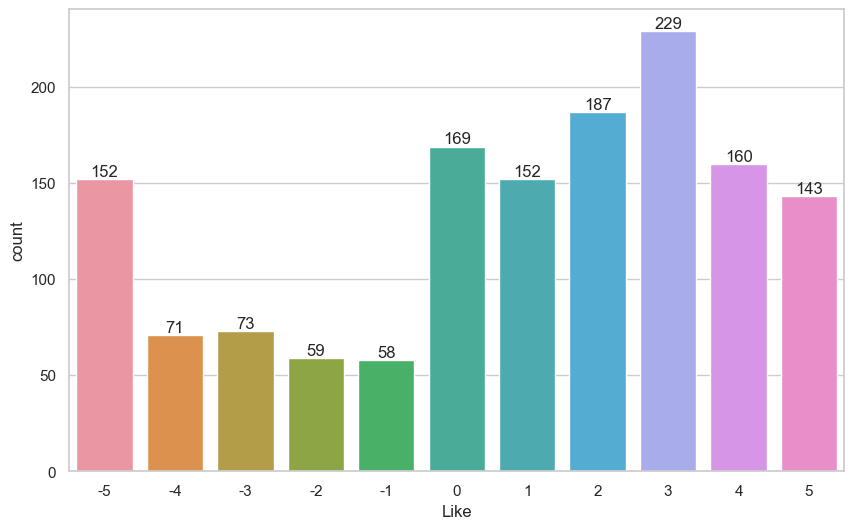

In [88]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Like',data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

* **More People have a positive perception of our brand, evident from the fact that more people have given us in the higher ratings than a lower rating**

### Rating distribution amoung different age groups and gender.

<Axes: xlabel='Like', ylabel='Age'>

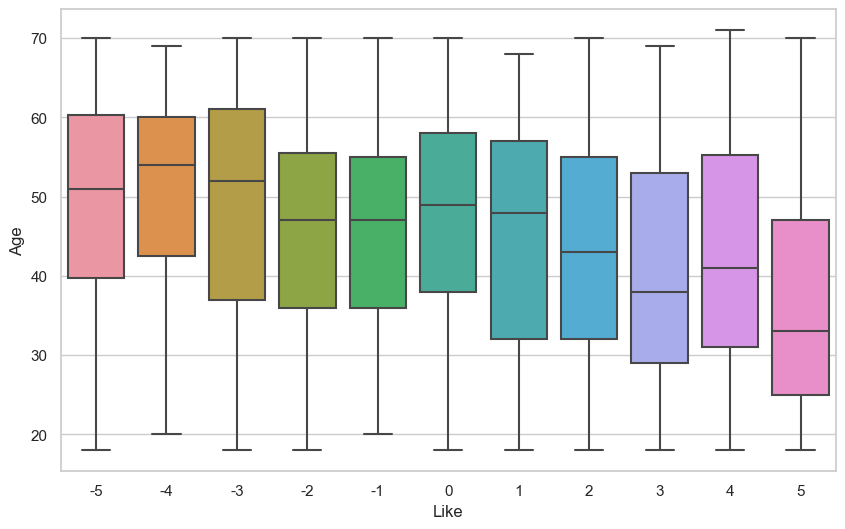

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Like", y="Age",data=df,)

* **Young people tend to like our brand more,the company can focus on young population. Also, we need to add more options to win old people.**

<Axes: xlabel='Like', ylabel='Gender'>

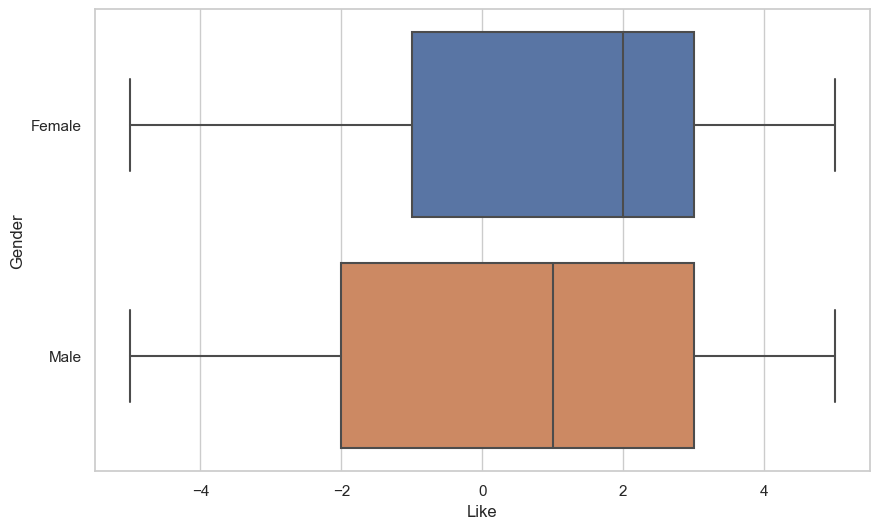

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Like", y="Gender",data=df)

* **It looks like females have a more positive perception about us. This also explains why the survey respondents who were essentially our customers were more women.**

## Section 3-B : PCA

### Lets store the 11 features in a separate dataframe

In [91]:
df_criteria=df[['yummy', 'convenient',
       'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive',
       'healthy', 'disgusting']]

In [92]:
df_criteria.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,False,True,False,True,False,True,True,False,True,False,False
1,True,True,False,True,True,True,True,True,True,False,False


In [93]:
from sklearn.decomposition import PCA
pca = PCA()

In [94]:
x_pca=pca.fit_transform(df_criteria)

In [95]:
pca.explained_variance_ratio_*100

array([29.94472319, 19.27972137, 13.30453519,  8.30957781,  5.94805227,
        5.02995614,  4.38490997,  3.95477912,  3.67608973,  3.23532907,
        2.93232614])

#### The first and second principle components captures around 50% information.

### Lets get our 1452 data points in terms of these 11 principle components into a dataframe

In [96]:
x_pca.shape   #Just a Check

(1453, 11)

In [97]:
Data_with_PCs=pd.DataFrame(x_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
Data_with_PCs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


### Now Lets see how the 11 attributes relates to these 11 principle components

In [98]:
pca.components_.shape

(11, 11)

In [99]:
PC_composition=pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'],columns=df_criteria.columns)

In [100]:
PC_composition

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
PC1,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
PC2,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
PC3,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
PC4,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
PC5,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
PC6,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
PC7,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
PC8,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
PC9,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
PC10,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


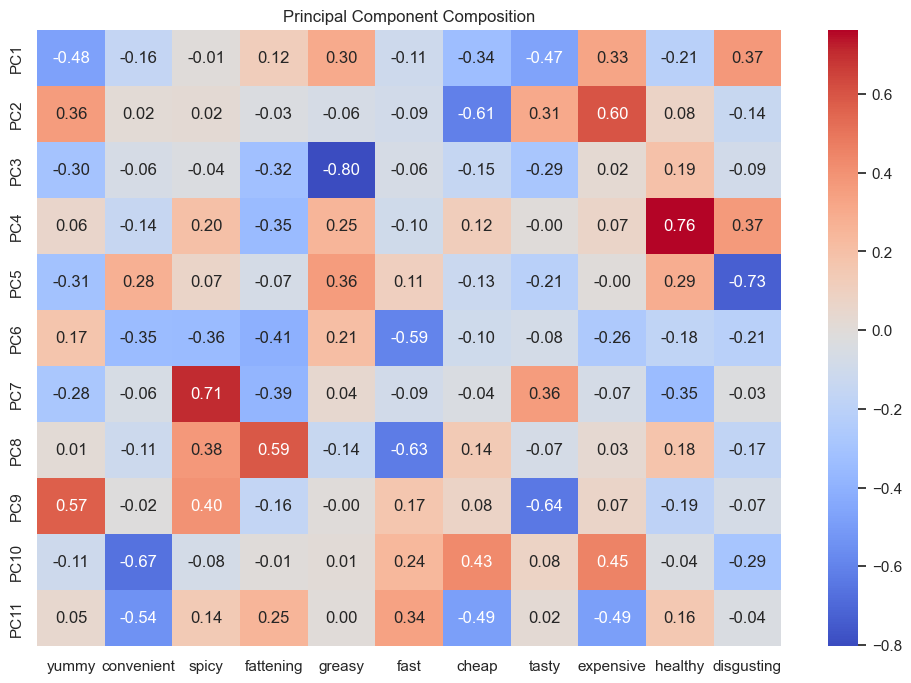

In [101]:
sns.set_palette("coolwarm")
plt.figure(figsize=(12, 8))
plt.title("Principal Component Composition")
sns.heatmap(PC_composition, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()


* **In relation to Principal Component 1, the variables 'Yummy' and 'Disgusting' exhibit the highest loadings. Notably, 'Yummy' has the highest positive loading, while 'Disgusting' displays the most negative loading. This pattern of loadings suggests that Principal Component 1 primarily captures the 'taste' dimension.**

* **For Principal Component 2, the variable'Cheap' displays the most negative loading, while 'Expensive' exhibits the highest positive loading. This prominent pattern of loadings strongly suggests that Principal Component 2 effectively captures the 'price' dimension.**

### Now lets use the 2 principle components to map different customers and 11 features in 2-D space

In [106]:
def biplot(score, coeff, labels):
    xs = score[:, 0]  # Extract the PCA1 scores for all rows(1453 here)
    ys = score[:, 1]  # Extract the PCA1 scores for all rows(1453 here)
    n = coeff.shape[0]  # Gives info about how many original variables there were (11 here)
    scalex = 1.5 / (xs.max() - xs.min())
    scaley = 1.5 / (ys.max() - ys.min())
    fig, ax = plt.subplots(figsize=(12, 10))

    sns.scatterplot(x=xs * scalex, y=ys * scaley)  # Pass xs and ys to x and y parameters

    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel("PC1 : Taste Dimension")
    ax.set_ylabel("PC2 : Price Dimension")


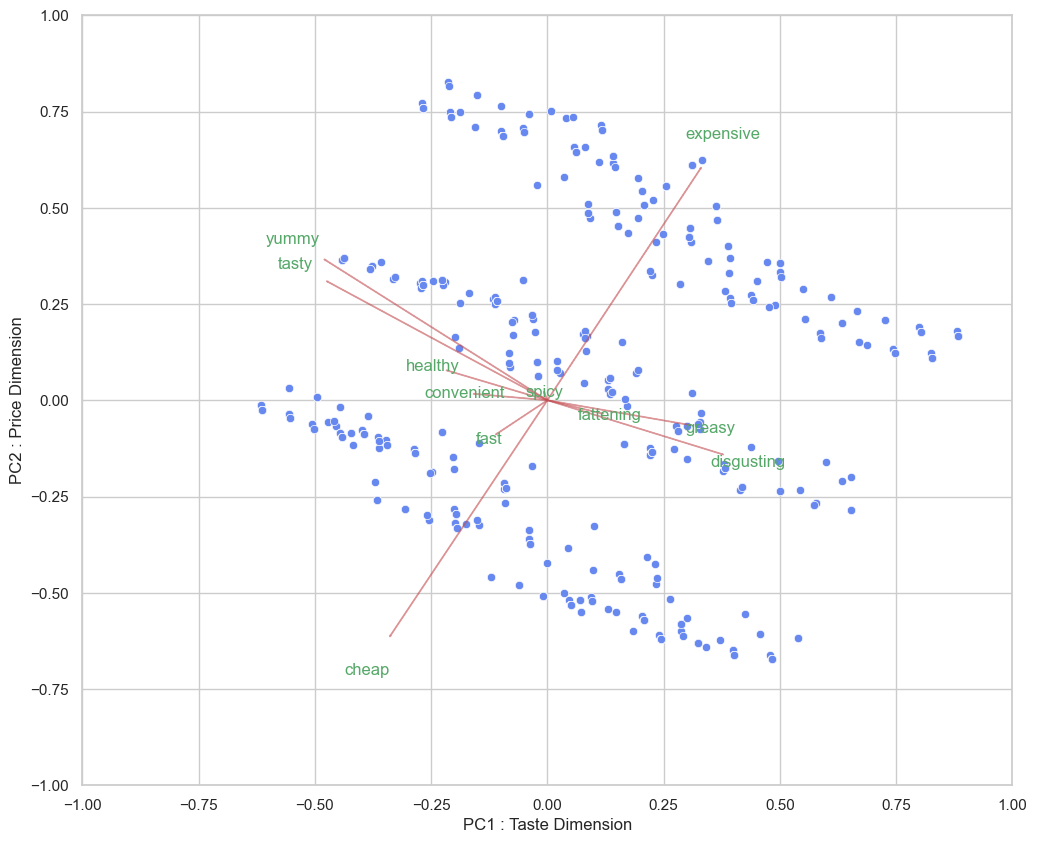

In [107]:
biplot(Data_with_PCs.values[:,0:2],np.transpose(PC_composition.values[0:2,:]),labels=df_criteria.columns)

* **Two attributes, 'CHEAP' and 'EXPENSIVE,' stand out as significant. These two attributes have a major influence on how products are evaluated, and they seem to be assessed independently of the other attributes.**
* **The remaining attributes can be grouped into positive and negative perceptions. Attributes like 'FATTENING,' 'DISGUSTING,' and 'GREASY' point in the same direction on the plot. This suggests that people who perceive a product as 'FATTENING' are also likely to perceive it as 'DISGUSTING' and 'GREASY.' On the other hand, positive attributes like 'FAST,' 'CONVENIENT,' 'HEALTHY,' 'TASTY,' and 'YUMMY' are aligned in the opposite direction.**
* **In terms of the 'EXPENSIVE' versus 'CHEAP' axis, we can see distinct groups of observations. There's a cluster of consumers at the bottom around the 'CHEAP' arrow, indicating they associate the product with being affordable. At the top, there's another cluster of respondents around the 'EXPENSIVE' arrow, suggesting they perceive the product as costly. Additionally, there's a middle group of respondents between these two clusters.**

## Section 4: Extracting Segments using K-Means Clusturing

### First let us find the number of k(segments) we should form

In [110]:
from yellowbrick.cluster import KElbowVisualizer

In [111]:
from sklearn.cluster import KMeans

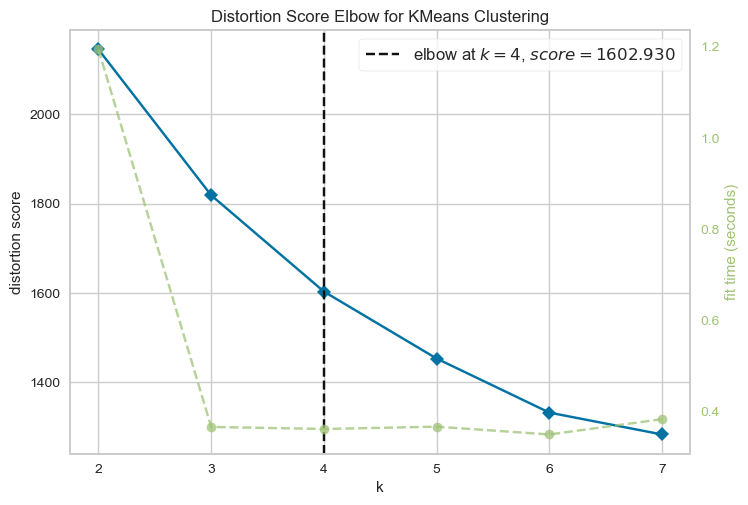

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8)).fit(df_criteria)
visualizer.show()

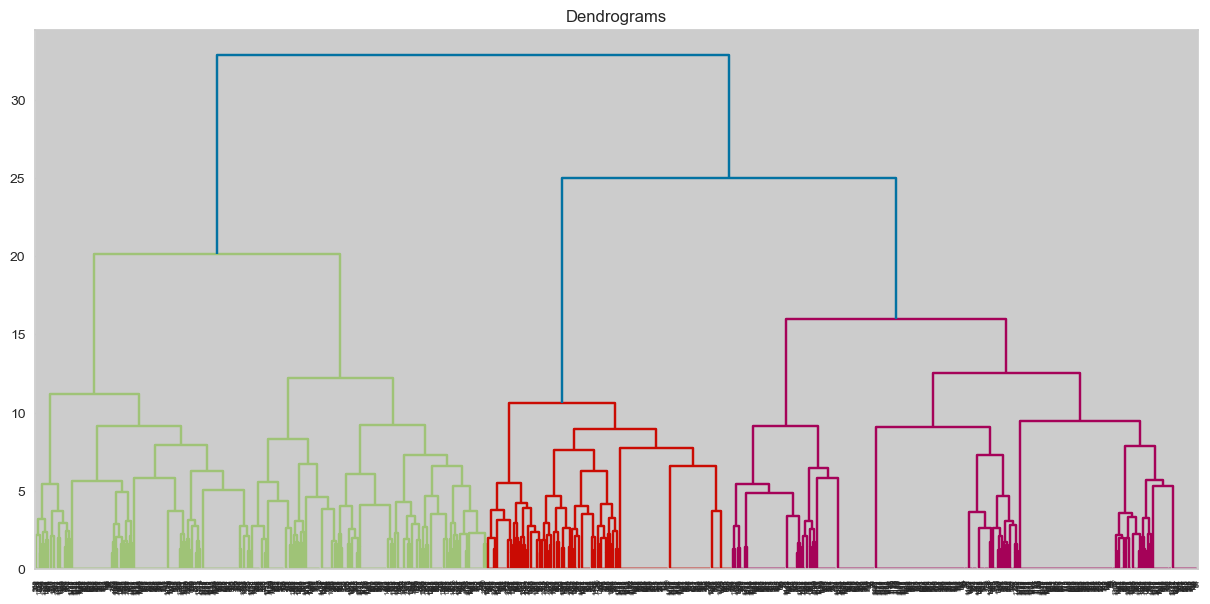

In [113]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_criteria, method='ward'))

### From all the above analysis, we can conclude that 4 clusters seems like a good fit for the data.

### Applying k means to get 4 customer segments

In [114]:
kmeans = KMeans(n_clusters=4).fit(df_criteria)

In [115]:
segments=kmeans.labels_
segments.shape

(1453,)

In [116]:
df_criteria['Cluster']=segments
df_criteria.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster
0,False,True,False,True,False,True,True,False,True,False,False,0
1,True,True,False,True,True,True,True,True,True,False,False,3


### Lets rename the clusters a little better.

In [117]:
def Cluster_namer(num):
    if(num==0):
        return 'A'
    elif(num==1):
        return 'B'
    elif(num==2):
        return 'C'
    else:
        return 'D'

In [118]:
df_criteria['Cluster']=df_criteria['Cluster'].apply(lambda x:Cluster_namer(x))

In [119]:
df_criteria.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster
0,False,True,False,True,False,True,True,False,True,False,False,A
1,True,True,False,True,True,True,True,True,True,False,False,D
2,False,True,True,True,True,True,False,True,True,True,False,D
3,True,True,False,True,True,True,True,True,False,False,True,B
4,False,True,False,True,True,True,True,False,False,True,False,A


## Section 5 Analyzing the segments

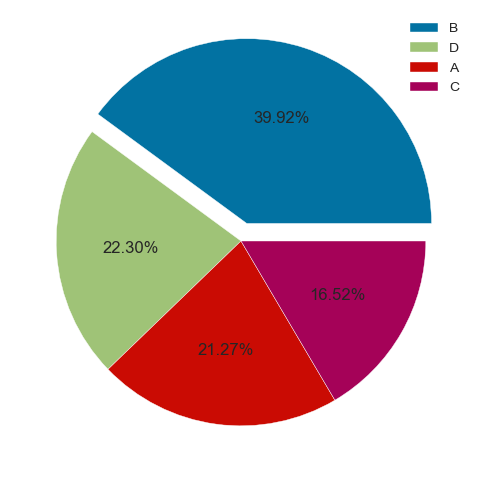

In [120]:
plt.figure(figsize=(6,6))
plt.pie(df_criteria['Cluster'].value_counts(),autopct='%1.2f%%',explode=[.1,0,0,0])
plt.legend(df_criteria['Cluster'].value_counts().index)
plt.show()

* **The majority of people are in segment B around 40% followed by segment D**

Text(0.5, 1.0, 'Cluster D')

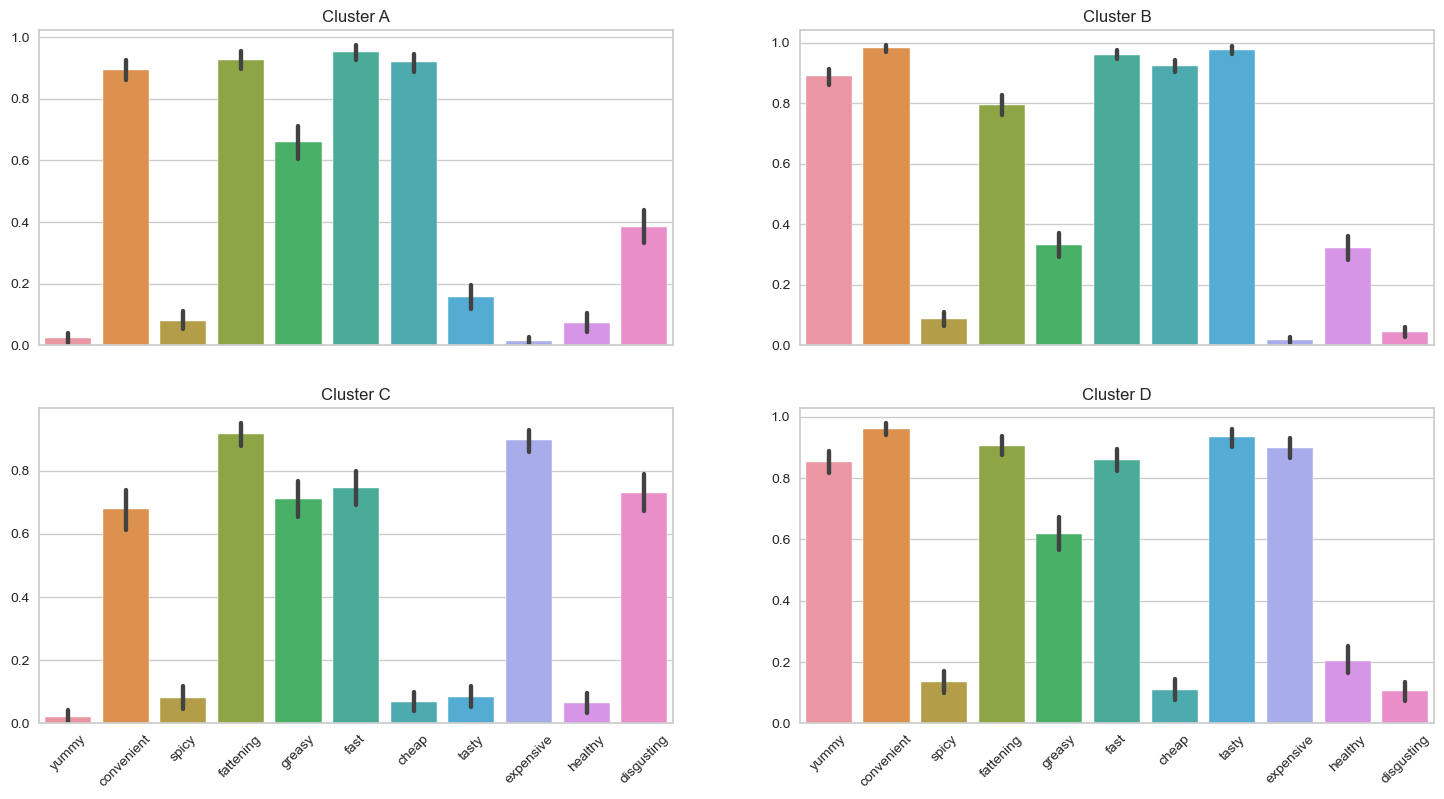

In [121]:
plt.figure(figsize=(18,9))
plt.subplot(2,2,1)
#plt.figure(figsize=(5,4))


sns.barplot(data=df_criteria[df_criteria['Cluster']=='A'].drop(['Cluster'],axis=1))
plt.tick_params(axis='x',label1On=False)
plt.title('Cluster A')

plt.subplot(2,2,2)
#plt.figure(figsize=(5,4))

sns.barplot(data=df_criteria[df_criteria['Cluster']=='B'].drop(['Cluster'],axis=1))
plt.tick_params(axis='x',label1On=False)
plt.title('Cluster B')

plt.subplot(2,2,3)
#plt.figure(figsize=(5,4))
plt.xticks(rotation = 45)
sns.barplot(data=df_criteria[df_criteria['Cluster']=='C'].drop(['Cluster'],axis=1))
plt.title('Cluster C')

plt.subplot(2,2,4)
#plt.figure(figsize=(5,4))
plt.xticks(rotation =45)
sns.barplot(data=df_criteria[df_criteria['Cluster']=='D'].drop(['Cluster'],axis=1))
plt.title('Cluster D')

* **We see that segment A thinks of our brand as cheap and greasy. This is a very distinct perception.**
* **Segment C views it as disgusting and expensive. This is also a very distinct perception, setting apart members of this segment from all other consumers.**
* **Members of segment D share the view that we are expensive, but also think that the food served is tasty and yummy.**
* **Finally, segment B is all praise: members of this market segment believe that food is tasty, yummy and cheap and at least to some extent healthy.**
* **Although not strong, concern for the oil is evident in all segments to some extent we should address this concern.**

### Lets create a biplot. 

In [124]:
def biplot(score, coeff, hue, labels):
    xs = score[:, 0]  # Extract the PCA1 scores for all rows(1453 here)
    ys = score[:, 1]  # Extract the PCA1 scores for all rows(1453 here)
    n = coeff.shape[0]  # Gives info about how many original variables there were (11 here)
    scalex = 1.5 / (xs.max() - xs.min())
    scaley = 1.5 / (ys.max() - ys.min())
    fig, ax = plt.subplots(figsize=(12, 10))

    sns.scatterplot(x=xs * scalex, y=ys * scaley, hue=hue)  # Pass x, y, and hue parameters

    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel("PC1 : Taste Dimension")
    ax.set_ylabel("PC2 : Price Dimension")


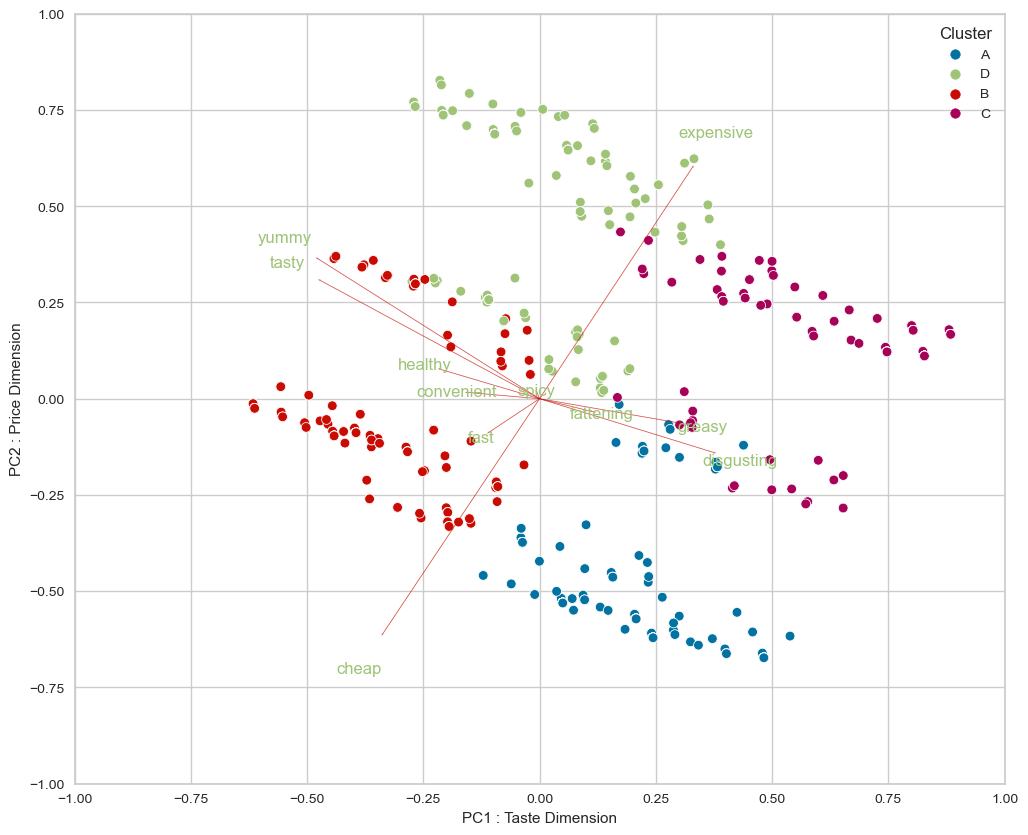

In [125]:
biplot(Data_with_PCs.values[:,0:2],np.transpose(PC_composition.values[0:2,:]),labels=df_criteria.columns,hue=df_criteria['Cluster'])

* **Segments A and B both view our brand as cheap, with members of segment B having some positive beliefs and members of segment A associating our brand primarily with negative attributes.**
* **At the other end of the price spectrum, majority of people in segments C and D agree that we are not cheap, but disagree on other features with segment C having a negative opinion and segment D having a positive one.**

### Lets add the Cluster column to main dataframe for further analysis for age and gender analysis of clusters

In [126]:
df.head(1)

,Like,Age,VisitFrequency,Gender,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-3,61,2,Female,False,True,False,True,False,True,True,False,True,False,False


In [127]:
df_criteria.head(1)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster
0,False,True,False,True,False,True,True,False,True,False,False,A


In [128]:
df['Cluster']=df_criteria['Cluster']
df.head(1)

,Like,Age,VisitFrequency,Gender,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster
0,-3,61,2,Female,False,True,False,True,False,True,True,False,True,False,False,A


### Analysis of Ratings in the segments.

In [129]:
crosstable=pd.crosstab(df['Like'],df['Cluster'])
df_temp=crosstable.transpose()
df_temp

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
Cluster,,,,,,,,,,,
A,54,36,34,29,26,53,32,31,12,2,0
B,4,4,2,6,13,43,65,90,143,111,99
C,89,27,30,18,12,37,13,6,8,0,0
D,5,4,7,6,7,36,42,60,66,47,44


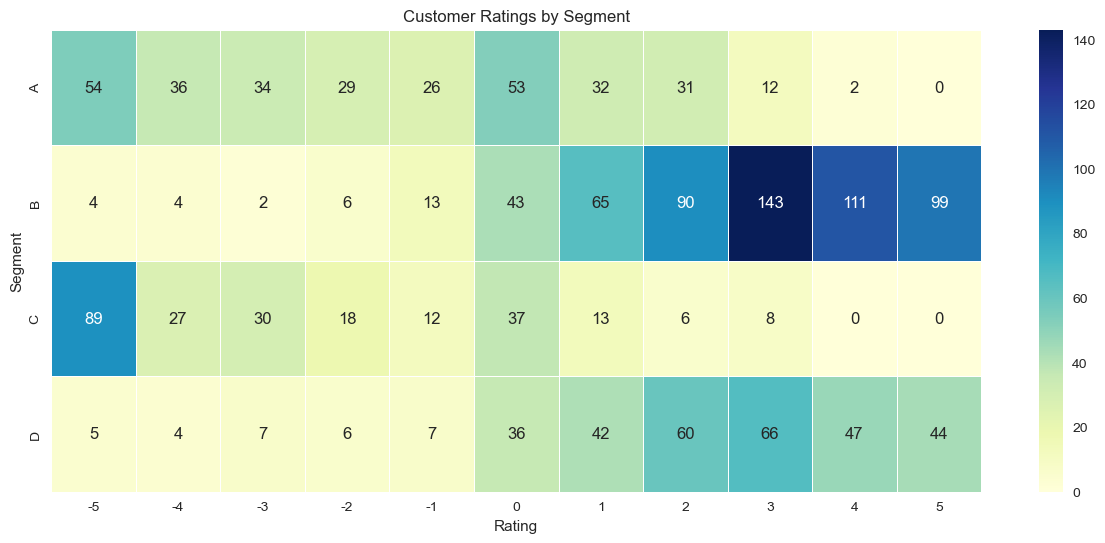

In [131]:
# Create a heatmap using Seaborn
plt.figure(figsize=(15, 6))

# Check if df_temp is empty or contains NaN values
if df_temp.empty or df_temp.isnull().values.any():
    print("DataFrame is empty or contains NaN values.")
else:
    sns.heatmap(df_temp, annot=True, fmt="d", cmap='YlGnBu', linewidths=0.5)
    plt.title('Customer Ratings by Segment')
    plt.xlabel('Rating')
    plt.ylabel('Segment')
    plt.show()



* **Members of segment C rarely express love for us. In stark contrast, members of segment B are significantly more likely to love our brand.**
* **Members of segment A appear to have negative to neutral feelings not as much as C but their likelihood of hating our brand is high.**
* **Majority of Members of the segment D have the strong positive feelings towards us**

### Gender distribution in the segments

In [40]:
crosstable=pd.crosstab(df['Gender'],df['Cluster'])
crosstable

KeyError: 'Cluster'

In [132]:
# Check the column names in df
print(df.columns)

# If 'Cluster' is not found in the column names, adjust accordingly
if 'Cluster' not in df.columns:
    print("Column 'Cluster' not found in the DataFrame.")
else:
    crosstable = pd.crosstab(df['Gender'], df['Cluster'])
    print(crosstable)


Index(['Like', 'Age', 'VisitFrequency', 'Gender', 'yummy', 'convenient',
       'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive',
       'healthy', 'disgusting', 'Cluster'],
      dtype='object')
Cluster    A    B    C    D
Gender                     
Female   183  349  101  155
Male     126  231  139  169


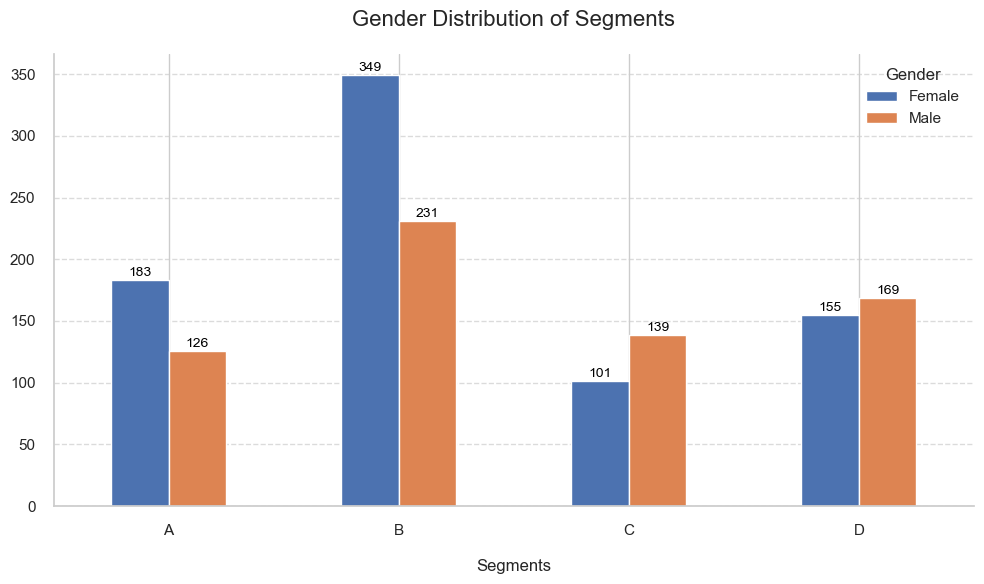

In [133]:
sns.set(style="whitegrid")

# Create the bar plot
ax = crosstable.transpose().plot(kind='bar', rot=0, figsize=(10, 6))

plt.xlabel("Segments", labelpad=15, fontsize=12)
plt.title("Gender Distribution of Segments", pad=20, fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():d}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


* **Segment C and segment D have a similar gender distribution with higher males.** 
* **Segment B and A contains significantly more Women.**

### Age distribution in the segments

In [42]:
sns.boxplot(x="Cluster", y="Age", data=df.sort_values('Cluster'),palette='rainbow')

KeyError: 'Cluster'

Index(['Like', 'Age', 'VisitFrequency', 'Gender', 'yummy', 'convenient',
       'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive',
       'healthy', 'disgusting', 'Cluster'],
      dtype='object')


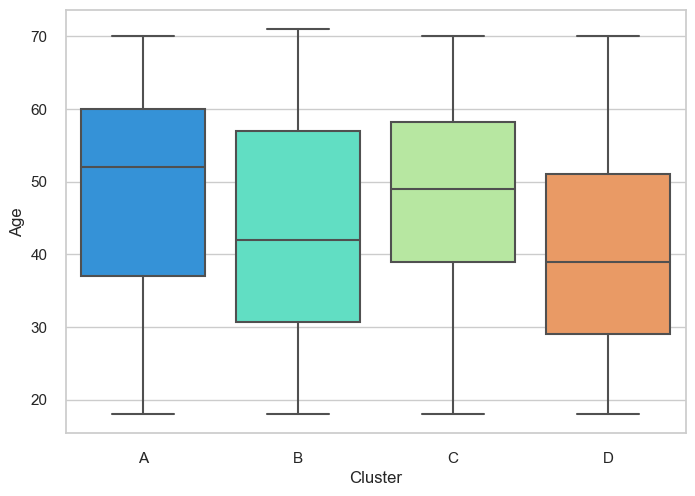

In [134]:
# Check the column names in df
print(df.columns)

# If 'Cluster' is not found in the column names, adjust accordingly
if 'Cluster' not in df.columns:
    print("Column 'Cluster' not found in the DataFrame.")
else:
    sns.boxplot(x="Cluster", y="Age", data=df.sort_values('Cluster'), palette='rainbow')
    plt.show()


### Here , we see a important correlation between age and perception

* **Segments B and D, who have a positive perception towards our brand, are in younger age groups**
* **Young people are more likely to like us** 

## Section 6: Selecting segments to target

In [135]:
df['VisitFrequency'].unique()

array([2, 4, 3, 1, 5, 0], dtype=int64)

In [136]:
def encoder(string):
    if(string=='Never'):
        return 0
    elif(string=='Once a year'):
        return 1
    elif(string=='Every three months'):
        return 2
    elif(string=='Once a month'):
        return 3
    elif(string=='Once a week'):
        return 4
    elif(string=='More than once a week'):
        return 5
    else:
        return 'Something missed'
    

In [137]:
df['VisitFrequency']=df['VisitFrequency'].apply(lambda x:encoder(x))

In [139]:
df['VisitFrequency'].unique()

array(['Something missed'], dtype=object)

In [140]:
import numpy as np

# Replace 'Something missed' with NaN
df['VisitFrequency'].replace('Something missed', np.nan, inplace=True)

# Convert the column to integers
df['VisitFrequency'] = df['VisitFrequency'].astype(float).astype('Int64')

# Now, check the unique values
print(df['VisitFrequency'].unique())


<IntegerArray>
[<NA>]
Length: 1, dtype: Int64


In [141]:
df_visit=pd.DataFrame(df.groupby('Cluster')['VisitFrequency'].mean())

In [142]:
df_Like=pd.DataFrame(df.groupby('Cluster')['Like'].mean())

In [143]:
df_visit

,VisitFrequency
Cluster,
A,<NA>
B,<NA>
C,<NA>
D,<NA>


TypeError: float() argument must be a string or a real number, not 'NAType'

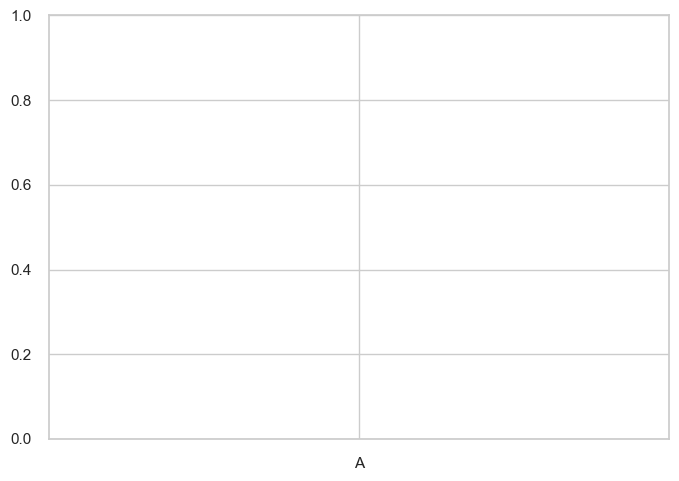

In [144]:
plt.plot(df_visit)

* **The visiting frequency is quite high for the B and D segment and low for the A and B segments**

In [ ]:
plt.title('Segment Evaluation')
sns.scatterplot(y=df_Like['Like'],x=df_visit['VisitFrequency'],hue=df_Like.index)
plt.show()

* **Market segments B and D are located in the attractive quadrant of the segment evaluation plot. Members of these two segments like us and visit us frequently. These segments need to be retained, and their needs must be satisfied in the future.**

* **Market segment C is located in the least attractive position. Members of this segment hate us, and rarely eat at our stores, making them unattractive as a potential market segment.**

* **Market segment A does not currently perceive us in a positive way. But in terms of likes and visitation frequency,some members of market segment A present as a viable target segment. Marketing action could attempt to address the negative perceptions of this segment, and re-inforce positive perceptions. As a result, we may be able to broaden our customer base.**

### Section 7: Customizing the marketing mix.

* **We can design marketing mix based on the seleted market segment.**

* **If, for example, we decide to focus on segment D (relatively young customers who like us, think the food is yummy and tasty, but perceive it as pretty expensive, we can offer a Budget line to cater specifically to the price expectations of this segment.**
* **The aim is that Members of segment D become loyal customers who, as they start earning more money, will not care about the price any more.**
* **Communication channels which are heavily used by members of this segment, can be used to communicate the availability of the new budget products**